In [1]:
import torch
import  numpy as np
from models.exhunelstm import ExHuneLSTM
import matplotlib.pyplot as plt

# ExtededHeunNet implementation of Time Series

In [2]:
seq_length = 120
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1
alpha=0.8
rnn = ExHuneLSTM(input_size, hidden_dim, alpha)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [3]:
print(rnn)

ExHuneLSTM(
  (lstm): LSTM(1, 32, batch_first=True, bidirectional=True)
)


In [4]:
time_steps = np.linspace(0,  16 * np.pi, seq_length + 1)

def train(rnn,n_steps, print_every):
    # initialize the hidden state
    hidden = None
    train_loss =[]
    for batch_i, step in enumerate(range(n_steps)):
         # defining the training data
        
        data = np.sin(time_steps)
        data.resize((seq_length + 1, 1))  # input_size=1

        x = data[:-1]
        y = data[1:]

         # convert data into Tensors
        x_tensor = torch.Tensor(x).unsqueeze(0)  # unsqueeze gives a 1, batch_size dimension
        y_tensor = torch.Tensor(y)

         # outputs from the rnn
         # prediction, hidden = rnn(x_tensor, hidden)
        prediction = rnn(x_tensor)
         ## Representing Memory ##
         # make a new variable for hidden and detach the hidden state from its history
         # this way, we don't backpropagate through the entire history
         # hidden = hidden.data

         # calculate the loss
        loss = criterion(prediction, y_tensor)
        loss_item = loss.item()
        train_loss.append(loss_item)
         # zero gradients
        optimizer.zero_grad()
         # perform backprop and update weights
        loss.backward()
        optimizer.step()

         # display loss and predictions
        if batch_i % print_every == 0:
            print('Epoch:  {0} | Loss: {1}'.format(batch_i,loss_item) )
            plt.plot(time_steps[1:], x, 'r-')  # input
            plt.plot(time_steps[1:], prediction[:,:,-1].detach().numpy().flatten(), 'b-')  # predictions
            plt.show()

    return rnn, train_loss

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0 | Loss: 0.12038567662239075


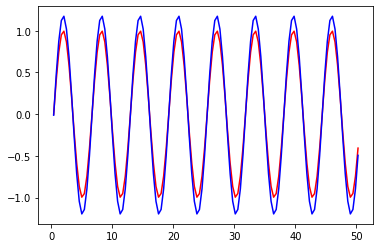

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  20 | Loss: 0.0073614539578557014


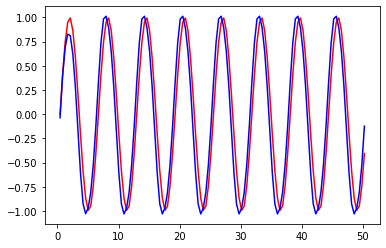

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  40 | Loss: 0.0037994347512722015


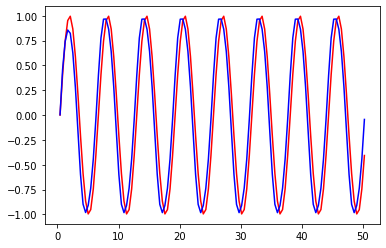

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  60 | Loss: 0.002034228527918458


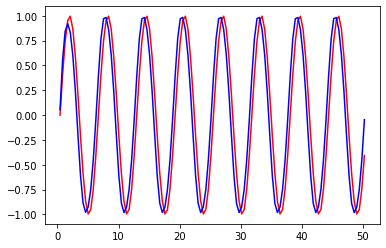

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  80 | Loss: 0.0010420961771160364


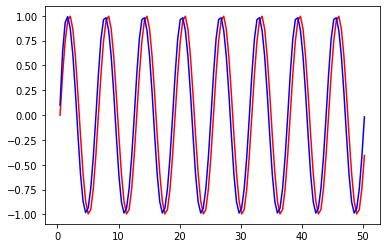

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  100 | Loss: 0.0007234180811792612


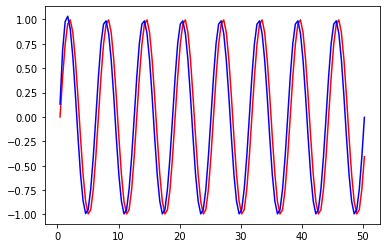

/usr/local/lib/python3.7/site-packages/torch/nn/modules/loss.py:446: UserWarning: Using a target size (torch.Size([120, 1])) that is different to the input size (torch.Size([1, 120, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [5]:
trained_rnn, train_loss =  train(rnn, 110, 20)

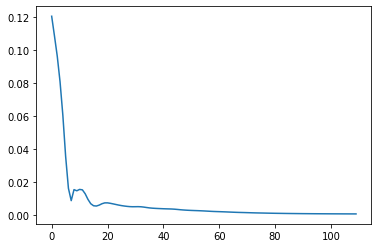

In [6]:
plt.plot(train_loss)